# Import Libraries


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datasist.structdata import detect_outliers
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.2)
%matplotlib inline

# Read CSV

In [138]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [139]:
df.shape

(5110, 12)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [141]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Cleaning

In [142]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [143]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['bmi']

0       36.6
1       28.1
2       32.5
3       34.4
4       24.0
        ... 
5105    28.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [144]:
df.drop(['id'], axis=1, inplace=True)

In [145]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [146]:
for col in df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',
               'smoking_status', 'stroke']]:
    print('_'*50)
    print(f'Name of values:{df[col].unique()}')
    print()
    print(df[col].value_counts())

__________________________________________________
Name of values:['Male' 'Female' 'Other']

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
__________________________________________________
Name of values:[0 1]

0    4612
1     498
Name: hypertension, dtype: int64
__________________________________________________
Name of values:[1 0]

0    4834
1     276
Name: heart_disease, dtype: int64
__________________________________________________
Name of values:['Yes' 'No']

Yes    3353
No     1757
Name: ever_married, dtype: int64
__________________________________________________
Name of values:['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
__________________________________________________
Name of values:['Urban' 'Rural']

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
_________________________

In [147]:
df['gender'] = df['gender'].replace('Other', 'Female')

In [148]:
df[df['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [149]:
# Feature engineering
def bmi_change(x):
    if x < 18.5:
        return 'Underweight'
    elif x >= 18.5 and x < 25:
        return 'Normalweigt'
    elif x >= 25 and x < 30:
        return 'Overweight'
    else :
        return 'Obesity'
df['bmi'] = df['bmi'].apply(bmi_change)

In [150]:
df['bmi'].value_counts()

Obesity        1920
Overweight     1610
Normalweigt    1243
Underweight     337
Name: bmi, dtype: int64

# Visulization Category Features 

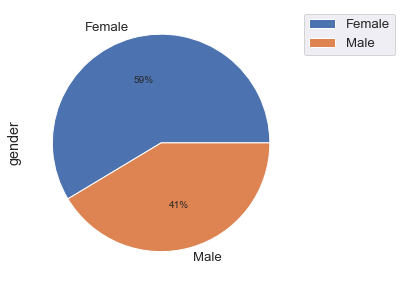

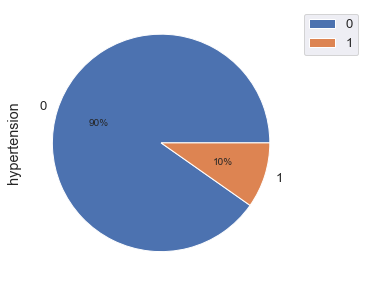

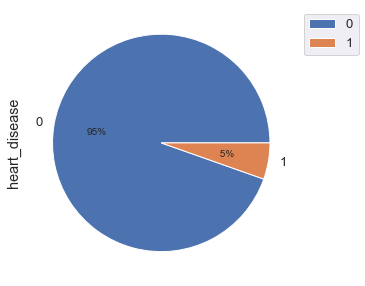

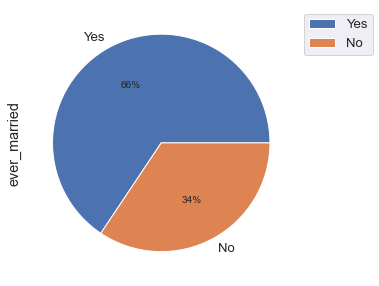

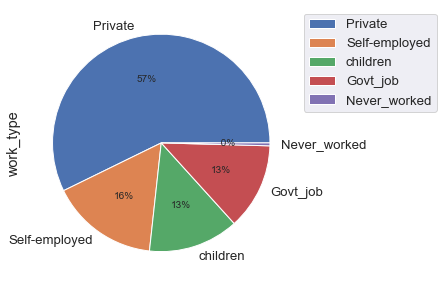

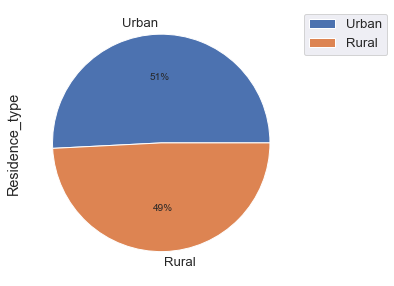

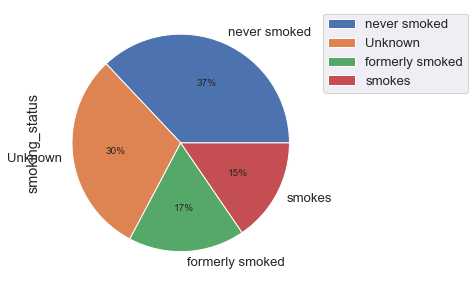

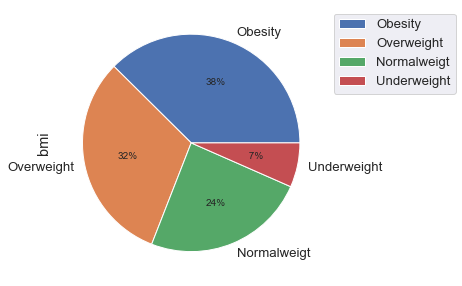

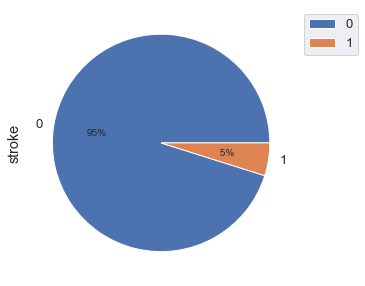

In [151]:
for col in df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type',
               'smoking_status', 'bmi', 'stroke']]:
    plt.figure(figsize=(15,5))    
    df[col].value_counts().plot.pie(autopct='%2.f%%')
    plt.legend(bbox_to_anchor=(1,1))
    plt.show()

# Visulization Category Features With Target 

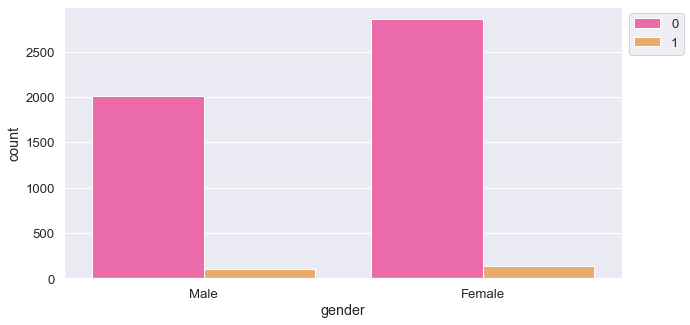

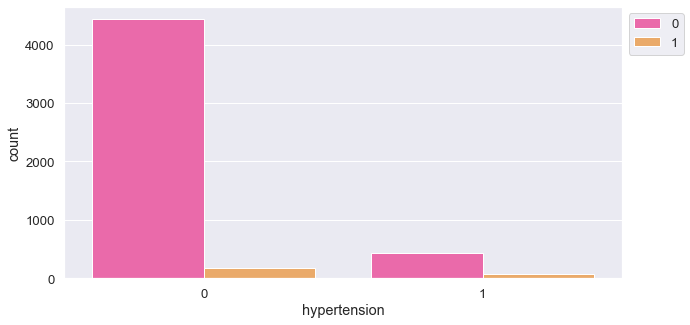

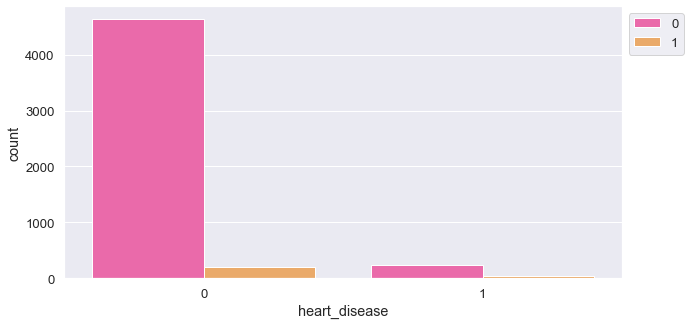

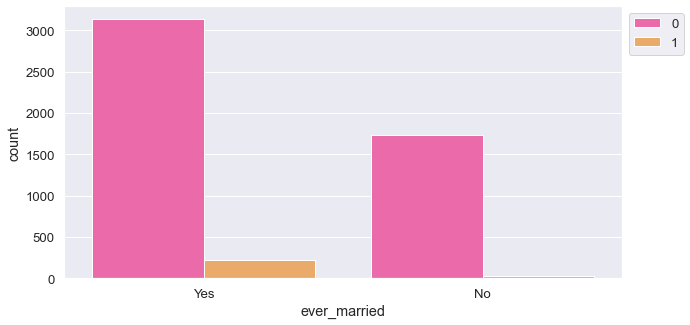

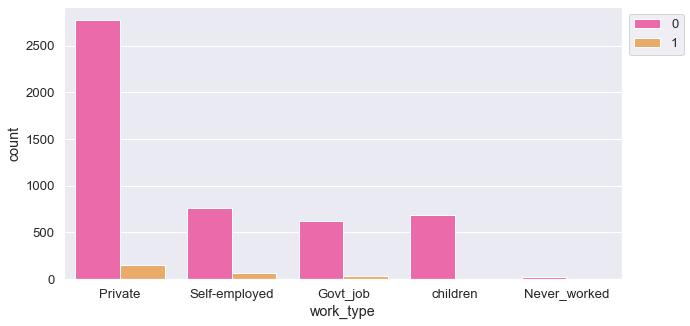

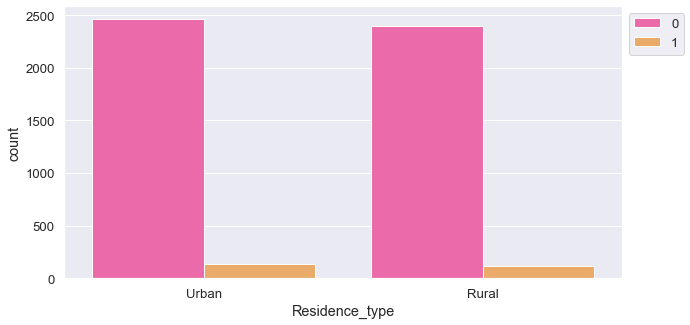

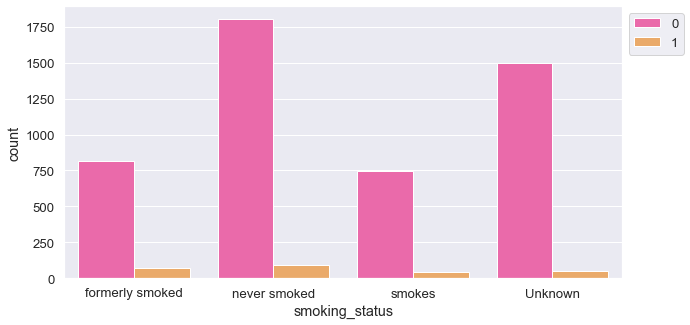

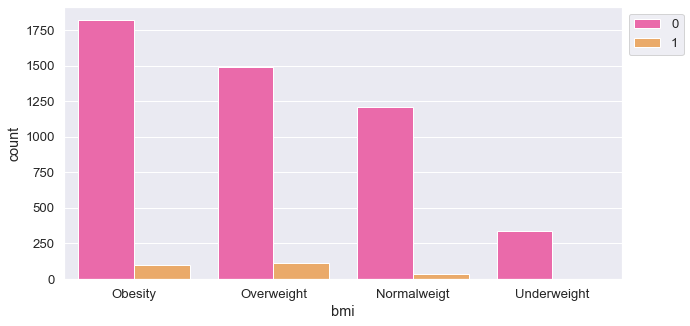

In [152]:
for col in df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'bmi']]:
    plt.figure(figsize=(10,5))    
    sns.countplot(df[col], hue=df['stroke'], palette='spring')
    plt.legend(bbox_to_anchor=(1,1), loc=2)
    plt.show()

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   object 
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 439.3+ KB


## Visulization Numerical Features

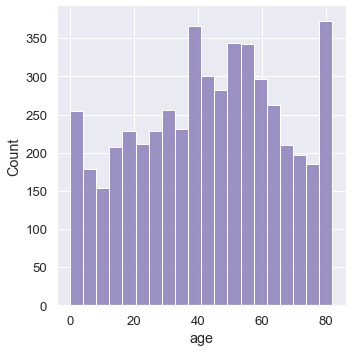

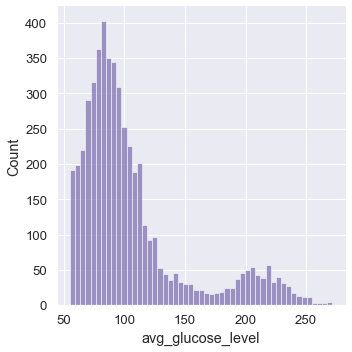

In [154]:
for col in df[['age','avg_glucose_level']]:
    sns.displot(df[col], color='m')
    plt.show()

# Detect outliers

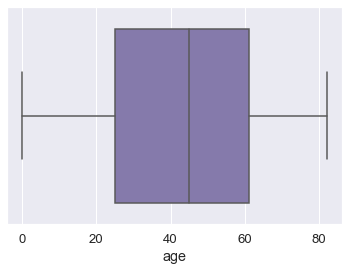

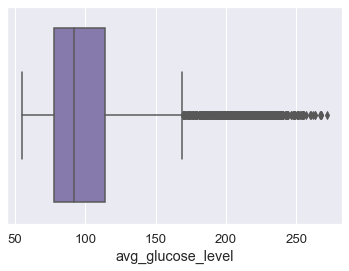

In [155]:
def boxplots(col):
    for col in df[['age','avg_glucose_level']]:
        sns.boxplot(df[col], color='m')
        plt.show()
boxplots(col)

In [156]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,Obesity,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,Overweight,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,Obesity,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,Obesity,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,Normalweigt,never smoked,1


# Remove outliers

In [157]:
outliers = detect_outliers(df, 0, ['avg_glucose_level'])
len(outliers)

627

In [158]:
df.shape

(5110, 11)

In [159]:
df.drop(outliers, inplace=True)

In [160]:
df.shape

(4483, 11)

In [161]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,105.92,Obesity,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,Overweight,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,Normalweigt,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,Overweight,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,Normalweigt,Unknown,1


# Encoding


In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df[['gender','ever_married','work_type','Residence_type','smoking_status', 'bmi']]:
    df[col] = le.fit_transform(df[col])

In [163]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,1,80.0,0,1,1,2,0,105.92,1,2,1
6,1,74.0,1,1,1,2,0,70.09,2,2,1
7,0,69.0,0,0,0,2,1,94.39,0,2,1
8,0,59.0,0,0,1,2,0,76.15,2,0,1
9,0,78.0,0,0,1,2,1,58.57,0,0,1


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

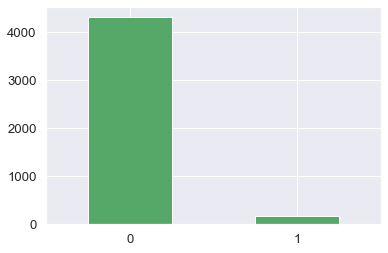

In [182]:
# Target feature before SMOTE
df['stroke'].value_counts().plot(kind='bar', color='g')
plt.xticks(rotation=None)

# Use SMOTE to imbalanced target feature

In [165]:
sm = SMOTE()
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('stroke', axis=1), df['stroke'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [166]:
oversampled_X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,80.000000,0,1,1,2,0,105.920000,1,2
1,1,74.000000,1,1,1,2,0,70.090000,2,2
2,0,69.000000,0,0,0,2,1,94.390000,0,2
3,0,59.000000,0,0,1,2,0,76.150000,2,0
4,0,78.000000,0,0,1,2,1,58.570000,0,0
...,...,...,...,...,...,...,...,...,...,...
8631,0,72.064835,0,0,1,0,0,131.446632,1,1
8632,0,76.606378,0,0,1,2,0,58.753770,2,1
8633,0,77.506987,0,0,1,2,0,60.967451,2,0
8634,0,76.362617,0,0,1,2,0,77.219364,2,1


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

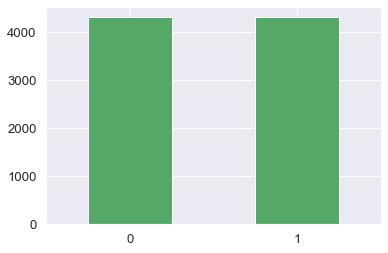

In [167]:
# Target feature after SMOTE
oversampled_Y.value_counts().plot(kind='bar', color='g')
plt.xticks(rotation=None)

# Build Machine Learning Model

In [168]:
X = oversampled.drop('stroke', axis=1)
Y = oversampled['stroke']

In [169]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)            

In [170]:
X.shape

(8636, 10)

In [171]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [172]:
models = {
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier" : KNeighborsClassifier(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "XGBClassifier" : xgb.XGBClassifier(),
    "SVC" : SVC()}

Using model: LogisticRegression 

Training Score: 0.8051534452808338
Test Score: 0.8119212962962963
F1_Score: 0.8096074985354423 

AxesSubplot(0.125,0.125;0.62x0.755)


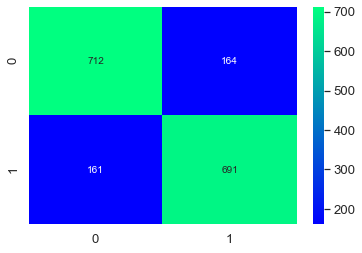

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       876
           1       0.81      0.81      0.81       852

    accuracy                           0.81      1728
   macro avg       0.81      0.81      0.81      1728
weighted avg       0.81      0.81      0.81      1728

------------------------------
Using model: KNeighborsClassifier 

Training Score: 0.9271858714533874
Test Score: 0.8946759259259259
F1_Score: 0.8995584988962472 

AxesSubplot(0.125,0.125;0.62x0.755)


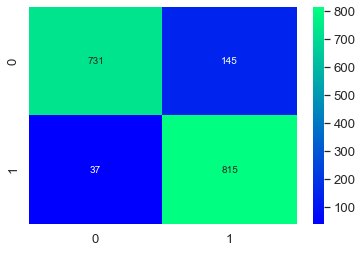

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       876
           1       0.85      0.96      0.90       852

    accuracy                           0.89      1728
   macro avg       0.90      0.90      0.89      1728
weighted avg       0.90      0.89      0.89      1728

------------------------------
Using model: DecisionTreeClassifier 

Training Score: 1.0
Test Score: 0.9224537037037037
F1_Score: 0.9229885057471264 

AxesSubplot(0.125,0.125;0.62x0.755)


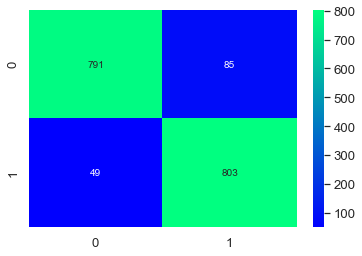

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       876
           1       0.90      0.94      0.92       852

    accuracy                           0.92      1728
   macro avg       0.92      0.92      0.92      1728
weighted avg       0.92      0.92      0.92      1728

------------------------------
Using model: RandomForestClassifier 

Training Score: 1.0
Test Score: 0.9519675925925926
F1_Score: 0.9518840579710145 

AxesSubplot(0.125,0.125;0.62x0.755)


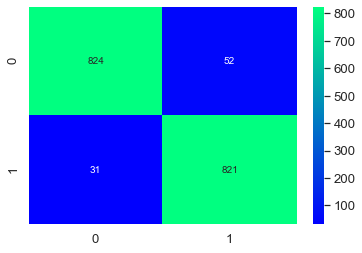

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       876
           1       0.94      0.96      0.95       852

    accuracy                           0.95      1728
   macro avg       0.95      0.95      0.95      1728
weighted avg       0.95      0.95      0.95      1728

------------------------------
Using model: XGBClassifier 

Training Score: 0.9946438911407064
Test Score: 0.96875
F1_Score: 0.9683098591549296 

AxesSubplot(0.125,0.125;0.62x0.755)


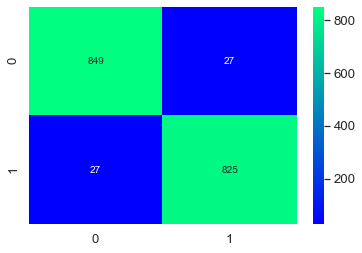

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       876
           1       0.97      0.97      0.97       852

    accuracy                           0.97      1728
   macro avg       0.97      0.97      0.97      1728
weighted avg       0.97      0.97      0.97      1728

------------------------------
Using model: SVC 

Training Score: 0.8747828604516502
Test Score: 0.8576388888888888
F1_Score: 0.8625698324022345 

AxesSubplot(0.125,0.125;0.62x0.755)


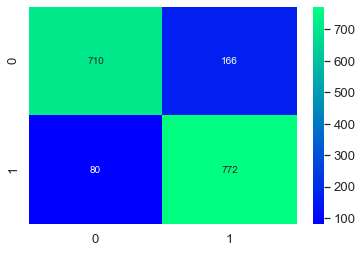

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       876
           1       0.82      0.91      0.86       852

    accuracy                           0.86      1728
   macro avg       0.86      0.86      0.86      1728
weighted avg       0.86      0.86      0.86      1728

------------------------------


In [173]:
for name, model in models.items():
    print(f'Using model: {name}', '\n')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1_Score: {f1_score(y_test, y_pred)}', '\n')
    
    print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='winter', fmt='d'))
    plt.show()
    print(classification_report(y_test, y_pred))
    print('-'*30)

Training Score: 0.9946438911407064
Test Score: 0.96875
F1_Score: 0.9683098591549296 

AxesSubplot(0.125,0.125;0.62x0.755)


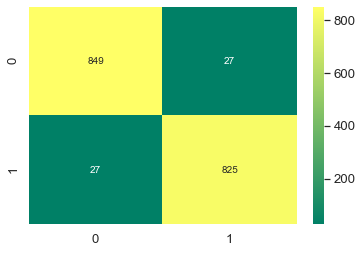

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       876
           1       0.97      0.97      0.97       852

    accuracy                           0.97      1728
   macro avg       0.97      0.97      0.97      1728
weighted avg       0.97      0.97      0.97      1728



In [181]:
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
print(f'Training Score: {model.score(x_train, y_train)}')

y_pred = model.predict(x_test)
print(f'Test Score: {accuracy_score(y_test, y_pred)}')
print(f'F1_Score: {f1_score(y_test, y_pred)}', '\n')

print(sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='summer', fmt='d'))
plt.show()
print(classification_report(y_test, y_pred))

## XGBClassifier is the best algorithm to predict stroke